In [115]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

#This model uses a neural network and GridSearchCV to classify whether prices will be up or down the following day

# Read the CSV and Perform Basic Data Cleaning

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [117]:
df_stock1 = pd.read_csv("../../static/data/cba.csv")#,index_col="Date",parse_dates=True)
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last rows to test prediction to actual
df= df_stock3.iloc[:-1,:]
#df = df.drop(df[df["SENTIMENT"]=='NEUTRAL'].index)
# Drop last 2 columns RBA FED
# N=2
# df = df_stock_less1.iloc[: , :-N]
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.date
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SENTIMENT,RBA,FED
0,3/01/2000,26.088652,26.088652,26.088652,26.088652,7.993308,0,NEGATIVE,4.98,5.87
1,4/01/2000,26.058813,26.058813,25.720646,25.790268,7.901886,1018072,NEGATIVE,4.98,5.87
2,5/01/2000,25.353634,25.392424,25.113932,25.213392,7.725136,2191283,NEGATIVE,4.98,5.87
3,6/01/2000,25.362585,25.362585,24.666357,24.716087,7.572770,1505531,POSITIVE,4.98,5.87
4,7/01/2000,24.913021,25.113932,24.735979,24.964741,7.648952,1414040,POSITIVE,4.98,5.87


In [118]:
df.shape

(5682, 10)

# Create a Train Test Split

Use `SENTIMENT` for the y values

In [119]:
X = df.drop("SENTIMENT", axis=1)
X = X.drop("Date", axis=1)
y = df["SENTIMENT"]#.values.reshape(-1, 1)
print(X.shape, y.shape)

(5682, 8) (5682,)


In [120]:
y

0       NEGATIVE
1       NEGATIVE
2       NEGATIVE
3       POSITIVE
4       POSITIVE
          ...   
5677    NEGATIVE
5678    NEGATIVE
5679    POSITIVE
5680    POSITIVE
5681    NEGATIVE
Name: SENTIMENT, Length: 5682, dtype: object

In [121]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [122]:
X_train.head()

,Open,High,Low,Close,Adj Close,Volume,RBA,FED
188,26.406927,26.834610,26.406927,26.824663,8.622582,1398867,6.24,6.60
4405,86.370003,86.680000,85.980003,86.680000,68.544342,2830371,1.50,0.83
3474,72.507156,73.511711,71.761200,73.422195,47.139221,2242065,2.55,0.07
4844,72.379997,72.800003,72.004997,72.470001,62.466644,2363648,1.50,2.40
4190,76.820000,77.209999,76.300003,76.989998,57.734768,2665616,1.75,0.30


In [123]:
y_train.head()

188     NEGATIVE
4405    NEGATIVE
3474    POSITIVE
4844    NEGATIVE
4190    NEGATIVE
Name: SENTIMENT, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [124]:
# Scale your X data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [125]:
# Label-encode y data set
label_encoder = LabelEncoder()
#label_encoder.fit(y_train)
encoded_y_train = label_encoder.fit_transform(y_train)
encoded_y_test = label_encoder.fit_transform(y_test)

In [126]:
encoded_y_train

array([0, 0, 2, ..., 1, 2, 0])

In [127]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
# YOUR CODE HERE
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [128]:
y_train_categorical

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [129]:
for label, original_class in zip(y_train_categorical, y_train):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: 

In [130]:
print(X_train_scaled.shape, y_train_categorical.shape)
df_y_train = pd.DataFrame(y_train_categorical)
df_y_train

(4261, 8) (4261, 3)


,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
4256,1.0,0.0,0.0
4257,0.0,0.0,1.0
4258,0.0,1.0,0.0
4259,0.0,0.0,1.0


# Select your features (columns)

In [131]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X_train_scaled)
selector.fit_transform(y_train_categorical)
print(X_train_scaled.shape, y_train_categorical.shape)

(4261, 8) (4261, 3)


In [132]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select = SelectKBest(chi2, k=6)
train_new_xy = select.fit_transform(X_train_scaled, y_train_categorical)
filter = select.get_support()
cols = X.columns.array
features = cols#[1:]
print(features)
print(features[filter])
X_train_scaled.shape


<PandasArray>
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RBA', 'FED']
Length: 8, dtype: object
<PandasArray>
['Open', 'High', 'Low', 'Close', 'Adj Close', 'RBA']
Length: 6, dtype: object


(4261, 8)

In [133]:
#In X keep only columns featured
X_train_featured = X_train_scaled[:,[0,1,2,3,4]]
X_test_featured = X_test_scaled[:,[0,1,2,3,4]]
X_train_featured_df = pd.DataFrame(X_train_featured)
X_train_featured_df 

,0,1,2,3,4,5
0,0.045539,0.048696,0.047885,0.050234,0.015837,0.961877
1,0.730194,0.731689,0.732393,0.732646,0.608110,0.115836
2,0.571909,0.581404,0.569015,0.581494,0.396540,0.004399
3,0.570457,0.573282,0.571817,0.570638,0.548037,0.346041
4,0.621153,0.623612,0.621167,0.622170,0.501267,0.038123
...,...,...,...,...,...,...
4256,0.087671,0.090014,0.090284,0.090490,0.039368,0.206745
4257,0.421567,0.420010,0.418365,0.416952,0.474811,0.001466
4258,0.686154,0.684473,0.678727,0.675612,0.503781,0.005865
4259,0.094940,0.095917,0.094169,0.097520,0.029015,0.964809


In [134]:
print(X_train_featured.shape, y_train_categorical.shape)
print(X_test_featured.shape, y_test_categorical.shape)

(4261, 6) (4261, 3)
(1421, 6) (1421, 3)


In [135]:
X_train_featured.shape
y_train_categorical.shape

(4261, 3)

# Train the Model

In [140]:
# Created a normal neural network with 6 inputs, 4 hidden nodes, and 3 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=5, activation='relu', input_dim=5))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 6)                 42        
                                                                 
 dense_55 (Dense)            (None, 300)               2100      
                                                                 
 dense_56 (Dense)            (None, 300)               90300     
                                                                 
 dense_57 (Dense)            (None, 200)               60200     
                                                                 
 dense_58 (Dense)            (None, 100)               20100     
                                                                 
 dense_59 (Dense)            (None, 3)                 303       
                                                                 
Total params: 173,045
Trainable params: 173,045
Non-tr

In [141]:
# Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [142]:
y_train_categorical.reshape(-1, 1)
y_test_categorical.reshape(-1, 1)

print(X_train_featured.shape, y_train_categorical.shape)
print(X_test_featured.shape, y_test_categorical.shape)

(4261, 6) (4261, 3)
(1421, 6) (1421, 3)


In [143]:
# Fit the model to the training data
# YOUR CODE HERE

model.fit(
    X_train_featured,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
134/134 - 1s - loss: 0.7967 - accuracy: 0.4992 - 507ms/epoch - 4ms/step
Epoch 2/100
134/134 - 0s - loss: 0.7713 - accuracy: 0.4989 - 201ms/epoch - 1ms/step
Epoch 3/100
134/134 - 0s - loss: 0.7708 - accuracy: 0.4996 - 209ms/epoch - 2ms/step
Epoch 4/100
134/134 - 0s - loss: 0.7682 - accuracy: 0.5102 - 209ms/epoch - 2ms/step
Epoch 5/100
134/134 - 0s - loss: 0.7714 - accuracy: 0.4952 - 212ms/epoch - 2ms/step
Epoch 6/100
134/134 - 0s - loss: 0.7710 - accuracy: 0.5041 - 188ms/epoch - 1ms/step
Epoch 7/100
134/134 - 0s - loss: 0.7677 - accuracy: 0.5126 - 212ms/epoch - 2ms/step
Epoch 8/100
134/134 - 0s - loss: 0.7687 - accuracy: 0.5079 - 206ms/epoch - 2ms/step
Epoch 9/100
134/134 - 0s - loss: 0.7683 - accuracy: 0.5053 - 208ms/epoch - 2ms/step
Epoch 10/100
134/134 - 0s - loss: 0.7686 - accuracy: 0.5041 - 208ms/epoch - 2ms/step
Epoch 11/100
134/134 - 0s - loss: 0.7684 - accuracy: 0.5093 - 193ms/epoch - 1ms/step
Epoch 12/100
134/134 - 0s - loss: 0.7678 - accuracy: 0.5093 - 192ms/epoch 

In [144]:
model_loss, model_accuracy = model.evaluate(X_train_featured, y_train_categorical, verbose=2)
print(f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

134/134 - 0s - loss: 0.7619 - accuracy: 0.5248 - 348ms/epoch - 3ms/step
Neural Network - Loss: 0.7618695497512817, Accuracy: 0.5247594714164734


In [145]:
print(f"Training Data Score: {model.evaluate(X_train_featured, y_train_categorical)}")
print(f"Testing Data Score: {model.evaluate(X_test_featured, y_test_categorical)}")

134/134 [==============================] - 0s 2ms/step - loss: 0.7619 - accuracy: 0.5248
Training Data Score: [0.7618695497512817, 0.5247594714164734]
45/45 [==============================] - 0s 2ms/step - loss: 0.7837 - accuracy: 0.4835
Testing Data Score: [0.7836796641349792, 0.4834623634815216]


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("../../static/data/cba.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SENTIMENT,RBA,FED
0,3/01/2000,26.088652,26.088652,26.088652,26.088652,7.993308,0,NEGATIVE,4.98,5.87
1,4/01/2000,26.058813,26.058813,25.720646,25.790268,7.901886,1018072,NEGATIVE,4.98,5.87
2,5/01/2000,25.353634,25.392424,25.113932,25.213392,7.725136,2191283,NEGATIVE,4.98,5.87
3,6/01/2000,25.362585,25.362585,24.666357,24.716087,7.572770,1505531,POSITIVE,4.98,5.87
4,7/01/2000,24.913021,25.113932,24.735979,24.964741,7.648952,1414040,POSITIVE,4.98,5.87


In [147]:
# Drop extra y
X_data = df.drop(columns=['SENTIMENT'], axis=1)
y_target = df['SENTIMENT']
print(X_data,y_target.shape)

            Date        Open        High         Low       Close   Adj Close  \
0      3/01/2000   26.088652   26.088652   26.088652   26.088652    7.993308   
1      4/01/2000   26.058813   26.058813   25.720646   25.790268    7.901886   
2      5/01/2000   25.353634   25.392424   25.113932   25.213392    7.725136   
3      6/01/2000   25.362585   25.362585   24.666357   24.716087    7.572770   
4      7/01/2000   24.913021   25.113932   24.735979   24.964741    7.648952   
...          ...         ...         ...         ...         ...         ...   
5678  26/04/2022  103.010002  105.254997  102.550003  104.750000  104.750000   
5679  27/04/2022  103.680000  103.870003  102.559998  103.000000  103.000000   
5680  28/04/2022  104.089996  104.370003  102.629997  103.230003  103.230003   
5681  29/04/2022  103.800000  104.190000  103.380000  103.880000  103.880000   
5682   2/05/2022  103.100000  103.350000  102.270000  102.970000  102.970000   

       Volume   RBA   FED  
0          

In [148]:
#In X_data keep only featured cols 
X_data_featured = X_data.iloc[:,[1,2,3,4,5]]
print(X_data_featured,y_target.shape)

            Open        High         Low       Close   Adj Close   FED
0      26.088652   26.088652   26.088652   26.088652    7.993308  5.87
1      26.058813   26.058813   25.720646   25.790268    7.901886  5.87
2      25.353634   25.392424   25.113932   25.213392    7.725136  5.87
3      25.362585   25.362585   24.666357   24.716087    7.572770  5.87
4      24.913021   25.113932   24.735979   24.964741    7.648952  5.87
...          ...         ...         ...         ...         ...   ...
5678  103.010002  105.254997  102.550003  104.750000  104.750000  0.08
5679  103.680000  103.870003  102.559998  103.000000  103.000000  0.08
5680  104.089996  104.370003  102.629997  103.230003  103.230003  0.08
5681  103.800000  104.190000  103.380000  103.880000  103.880000  0.08
5682  103.100000  103.350000  102.270000  102.970000  102.970000  0.08

[5683 rows x 6 columns] (5683,)


In [149]:
# Split data and target into training and testing
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_target_train, y_target_test = train_test_split(X_data_featured,y_target,test_size=0.4,random_state=42)
print(X_data_train.shape,y_target_train.shape)
print(X_data_test.shape,y_target_test.shape)

(3409, 6) (3409,)
(2274, 6) (2274,)


In [150]:
y_target_train

2973    POSITIVE
2655    POSITIVE
4404    POSITIVE
3539    NEGATIVE
3836    POSITIVE
          ...   
3772    POSITIVE
5191    POSITIVE
5226    NEGATIVE
5390    POSITIVE
860     POSITIVE
Name: SENTIMENT, Length: 3409, dtype: object

In [151]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_data_train)
X_data_train_scaled = X_scaler.transform(X_data_train)
X_data_test_scaled = X_scaler.transform(X_data_test)

In [152]:
#Label-encode data set
label_encoder = LabelEncoder()
y_target_train_encoded = label_encoder.fit_transform(y_target_train)
y_target_test_encoded = label_encoder.fit_transform(y_target_test)

In [153]:
print(X_data_train_scaled.shape,y_target_train_encoded.shape)
print(X_data_test_scaled.shape,y_target_test_encoded.shape)

(3409, 6) (3409,)
(2274, 6) (2274,)


In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [155]:

model_params = {
    'n_neighbors' : {
        'model' : KNeighborsClassifier(),
        'params' : {
           'n_neighbors': [3,5,11,19],
           'weights': ['uniform','distance']
        }
    },
    'svm' : {
        'model' : svm.SVC(),
        'params' : {
            'C' : [1,5,10,50],
            'kernel': ['rbf','linear'],
            'gamma': [0.0001, 0.0005, 0.001, 0.005]
        }
    },
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50,80],
            'max_features': ['auto','sqrt'],
            'max_depth': [2,4],
            'min_samples_split': [2,5],
            'min_samples_leaf': [1,2],
            'bootstrap': [True,False]
        }
    },
    'logistic_regression' : {
    'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
    'params' : { 'C': [1,5,10,50]
    }
  }
}

In [156]:
from sklearn.model_selection import GridSearchCV
scores= []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_data_train, y_target_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})

KeyboardInterrupt: 

In [ ]:
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,n_neighbors,0.492229,"{'n_neighbors': 11, 'weights': 'distance'}"
1,svm,0.508653,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}"
2,random_forest,0.515103,"{'bootstrap': True, 'max_depth': 4, 'max_featu..."
3,logistic_regression,0.507774,{'C': 1}


In [ ]:
# Make predictions with the hypertuned model
predictions_clf = clf.predict(X_data_test_scaled)

from sklearn.metrics import classification_report
target_names = ["NEGATIVE 0","NEUTRAL 1","POSITIVE 1"] 
print(classification_report(y_target_test_encoded, predictions_clf, target_names=target_names))

ValueError: Mix of label input types (string and number)

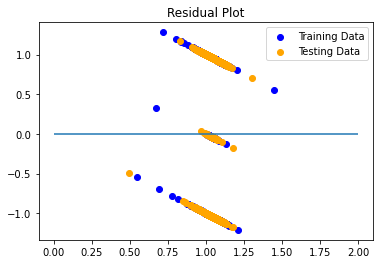

In [ ]:
# LinearRegression model: fit it to the scaled training data
from sklearn.linear_model import LinearRegression
modelLG1 = LinearRegression()
modelLG1.fit(X_data_train_scaled, y_target_train_encoded)

# Make predictions using fitted model
predictions1 = modelLG1.predict(X_data_train_scaled)

# Plotted the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(modelLG1.predict(X_data_train_scaled), y_target_train_encoded - modelLG1.predict(X_data_train_scaled), c="blue", label="Training Data")
plt.scatter(modelLG1.predict(X_data_test_scaled), y_target_test_encoded - modelLG1.predict(X_data_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_target_test_encoded.min(), xmax=y_target_test_encoded.max())
plt.title("Residual Plot")
plt.show()

# Save the Model

In [ ]:
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'sentiment.sav'
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://b41aaa6c-8f3b-4322-88f8-e30bdd879f9a/assets


['sentiment.sav']